# 
***

### I. Final DF

In [1]:
import os 
import pandas as pd
from tqdm import tqdm 
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

# local :


In [3]:
path_project = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_project}/TropiGATv2.final_df_v2.tsv", sep = "\t" ,  header = 0)

DF_info = DF_info.drop_duplicates(subset = ["Protein_name"])

df_prophages = DF_info.drop_duplicates(subset = ["Phage"], keep = "first")
dico_prophage_info = {row["Phage"] : {"prophage_strain" : row["prophage_id"] , "ancestor" : row["Infected_ancestor"]} for _,row in df_prophages.iterrows()}

def get_filtered_prophages(prophage) :
    combinations = []
    to_exclude = set()
    to_keep = set()
    to_keep.add(prophage)
    df_prophage_group = DF_info[(DF_info["prophage_id"] == dico_prophage_info[prophage]["prophage_strain"]) & (DF_info["Infected_ancestor"] == dico_prophage_info[prophage]["ancestor"])]
    if len(df_prophage_group) == 1 :
        pass
    else :
        depo_set = set(df_prophage_group[df_prophage_group["Phage"] == prophage]["domain_seq"].values)
        for prophage_tmp in df_prophage_group["Phage"].unique().tolist() :
            if prophage_tmp != prophage :
                tmp_depo_set = set(df_prophage_group[df_prophage_group["Phage"] == prophage_tmp]["domain_seq"].values)
                if depo_set == tmp_depo_set :
                    to_exclude.add(prophage_tmp)
                else :
                    if tmp_depo_set not in combinations :
                        to_keep.add(prophage_tmp)
                        combinations.append(tmp_depo_set)
                    else :
                        to_exclude.add(prophage_tmp)
    return df_prophage_group , to_exclude , to_keep

good_prophages = set()
excluded_prophages = set()

for prophage, info_prophage in tqdm(dico_prophage_info.items()) :
    if prophage not in excluded_prophages and prophage not in good_prophages:
        _, excluded_members , kept_members = get_filtered_prophages(prophage)
        good_prophages.update(kept_members)
        excluded_prophages.update(excluded_members)

DF_info_lvl_0_filtered = DF_info[DF_info["Phage"].isin(good_prophages)]
DF_info_lvl_0_final = DF_info_lvl_0_filtered[~DF_info_lvl_0_filtered["KL_type_LCA"].str.contains("\\|")]

DF_info_lvl_0 = DF_info_lvl_0_final.copy()



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15981/15981 [00:34<00:00, 464.56it/s]


In [12]:
DF_info_lvl_0_prophages = DF_info_lvl_0.drop_duplicates(subset = ["Phage"])

In [13]:
final_unique = DF_info_lvl_0["seq"].unique().tolist()
len(final_unique)

3908

In [8]:
DF_info_lvl_0

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,0.025276,0.053137,...,-0.011464,0.081105,0.012011,0.042917,0.009402,0.093175,-0.080562,0.000897,0.111854,prophage_11309
4,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
10,GCF_001701985.1__phage2,GCF_001701985.1__phage2__357,KL30,n4988,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_6465
12,GCF_001611095.1__phage5,GCF_001611095.1__phage5__1365,KL30,n49894989,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
15,GCF_902156555.1__phage3,GCF_902156555.1__phage3__511,KL30,GCF_902156555.1,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21342,GCF_900506765.1__phage17,GCF_900506765.1__phage17__90,KL149,GCF_900506765.1,anubis_return__4216,anubis_return,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,0.053704,0.083858,...,0.032803,0.109572,0.010032,0.024949,0.094129,0.028693,-0.061396,0.006824,0.046220,prophage_15598
21344,GCF_003255785.1__phage1,GCF_003255785.1__phage1__10,KL127,GCF_003255785.1,anubis_return__4239,anubis_return,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,0.010626,-0.025389,...,0.045372,0.009262,-0.008319,-0.050856,0.034115,0.101663,-0.108278,-0.135629,0.102486,prophage_3577
21346,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,0.073450,0.046651,...,0.035302,0.012151,0.003563,-0.022575,0.014130,0.063376,-0.050646,-0.085156,-0.010849,prophage_6002
21347,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656


In [14]:
DF_info_lvl_0.drop_duplicates(subset = ["Phage"])

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,0.025276,0.053137,...,-0.011464,0.081105,0.012011,0.042917,0.009402,0.093175,-0.080562,0.000897,0.111854,prophage_11309
4,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
10,GCF_001701985.1__phage2,GCF_001701985.1__phage2__357,KL30,n4988,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_6465
12,GCF_001611095.1__phage5,GCF_001611095.1__phage5__1365,KL30,n49894989,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
15,GCF_902156555.1__phage3,GCF_902156555.1__phage3__511,KL30,GCF_902156555.1,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21341,GCF_000349245.1__phage1,GCF_000349245.1__phage1__213,KL53,n56795679,anubis_return__4209,anubis_return,MTRLPESSLWEDEIELISRSERVSGGLDGVANRPLKSLANRTRYLK...,LGRLWKRRFEGNEIRMAWARAKSLKQTSAPQDFAFKNCLKAAASIS...,-0.001302,0.069886,...,0.014471,0.095149,0.058190,0.047760,0.130289,0.055118,-0.061362,0.013399,0.027540,prophage_237
21342,GCF_900506765.1__phage17,GCF_900506765.1__phage17__90,KL149,GCF_900506765.1,anubis_return__4216,anubis_return,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,0.053704,0.083858,...,0.032803,0.109572,0.010032,0.024949,0.094129,0.028693,-0.061396,0.006824,0.046220,prophage_15598
21346,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,0.073450,0.046651,...,0.035302,0.012151,0.003563,-0.022575,0.014130,0.063376,-0.050646,-0.085156,-0.010849,prophage_6002
21347,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656


In [9]:
DF_info_lvl_0= DF_info_lvl_0.drop_duplicates(subset = ["Protein_name"])

In [15]:
DF_info_lvl_0[DF_info_lvl_0["Phage"] == "GCF_003037395.1__phage28"]

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
340,GCF_003037395.1__phage28,GCF_003037395.1__phage28__164,KL64,GCF_003037395.1,minibatch__1273,minibatch,MNYYYIDSSATVNGVGTKGNPFNSIQSAIDANLTHPLTLYLKAGQT...,MNYYYIDSSATVNGVGTKGNPFNSIQSAIDANLTHPLTLYLKAGQT...,-0.007588,0.019644,...,0.010450,0.097394,0.046235,0.014105,0.057665,0.083206,-0.064217,0.031252,0.009445,prophage_6641
2152,GCF_003037395.1__phage28,GCF_003037395.1__phage28__167,KL64,GCF_003037395.1,ppt__2890,ppt,MSNETQKISELNPATTLTEHTLFPVVSEQTETSNTDISTLRSVLLF...,SNETQKISELNPATTLTEHTLFPVVSEQTETSNTDISTLRSVLLFD...,0.007624,0.028380,...,-0.030270,0.062300,0.020503,0.027938,0.015182,0.122702,-0.086007,0.042296,0.067712,prophage_6641
14965,GCF_003037395.1__phage28,GCF_003037395.1__phage28__177,KL64,GCF_003037395.1,ppt__2887,ppt,MDKSSLKITELPALSVASENGFIPIAQVKEENDTYKVTLKKLRESV...,NKIYVDALGDFNNGQDGCAEAIMARIKEITGKSDSAYVNGDKFFIA...,0.001410,0.052709,...,-0.019397,0.096831,0.002452,0.029498,0.039154,0.061872,-0.067134,0.050064,0.085825,prophage_6641
14966,GCF_003037395.1__phage28,GCF_003037395.1__phage28__171,KL64,GCF_003037395.1,ppt__2888,ppt,MPKSSDSIGIKISELGDAGIIKENDVVPINAKTDAGVAFTKATKIN...,LPTTLATDVDSLRFADYVGGTYLPTLSAMRTGAKFELARAITKEKY...,-0.011785,0.046625,...,-0.013837,0.125104,0.020102,0.023301,0.045658,0.082110,-0.083664,0.028020,0.086668,prophage_6641
14967,GCF_003037395.1__phage28,GCF_003037395.1__phage28__175,KL64,GCF_003037395.1,ppt__2891,ppt,MLTDFNKPRGSNGDYGRVVVKTLDDLKTFKPWYSGQVIILERVIPG...,NTSQGYNPLLLLGQNGFSDISACINKIAADLAVKYSTAIGIIDFPT...,0.053718,0.028007,...,0.026239,0.095416,-0.003538,0.025964,0.035594,0.068101,-0.080036,0.045242,0.080990,prophage_6641
14968,GCF_003037395.1__phage28,GCF_003037395.1__phage28__170,KL64,GCF_003037395.1,ppt__2892,ppt,MADIYVKLSELSRPSTPVNDSDVVFISQLNNTENISSAMSISDLRD...,IKEVPSIEDLRTLPVLIDGQKVKVRGFRAPSLYGGGEFVGRIGTAT...,0.037914,0.025463,...,0.018263,0.079228,-0.009274,0.011075,-0.017480,0.094693,-0.074441,0.022270,0.051372,prophage_6641
14969,GCF_003037395.1__phage28,GCF_003037395.1__phage28__184,KL64,GCF_003037395.1,ppt__2893,ppt,MTDFSLKSKALLIRQLNTQYDAFFKDSDLEFINLTAITGGEFNTRI...,GLMRFSTDLDLAEWFYPFGVTYYIDGNLGADNNEGTSSAPLKTLNG...,0.004004,-0.004517,...,0.042675,0.124898,0.048045,0.004057,0.059556,0.091173,-0.052938,0.010669,0.022777,prophage_6641
14970,GCF_003037395.1__phage28,GCF_003037395.1__phage28__178,KL64,GCF_003037395.1,ppt__2894,ppt,MLDHLLQPSGNTSVSSVKETIANLIGLPTSTIVALESGNAVDNNSV...,YAVEIEAVKYGVGLTADKQINKEILEQLVAWNMGRVRIRLPAKTIY...,0.019770,0.017550,...,0.040335,0.100349,-0.014039,0.036126,0.020983,0.099648,-0.057100,0.039589,0.066719,prophage_6641
14971,GCF_003037395.1__phage28,GCF_003037395.1__phage28__173,KL64,GCF_003037395.1,minibatch__672,minibatch,MQTNFIQPGGSTSIQSSGEVLSQLLNIPQASIGSIELGVDLTNLSF...,TSKPINVWMAGFSVSANNLAQCINKITGDIVNSVIARGYIANGTNR...,-0.004028,0.072705,...,-0.006734,0.124378,0.025761,0.047219,0.051778,0.026652,-0.086979,0.075123,0.076589,prophage_6641
14972,GCF_003037395.1__phage28,GCF_003037395.1__phage28__172,KL64,GCF_003037395.1,minibatch__2047,minibatch,MANNTRKISELSSKGIVPESALLPVAVAGAEKETYRTTLNNLRANL...,TASSIDIYSFGAKDNSIADNVSFDNRAAIQKAVDYANSKYLTTGSI...,0.009264,0.035480,...,0.006973,0.146602,0.004998,-0.015865,0.014900,0.032773,-0.052883,0.005489,0.067138,prophage_6641


In [10]:
DF_info_lvl_0

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,0.025276,0.053137,...,-0.011464,0.081105,0.012011,0.042917,0.009402,0.093175,-0.080562,0.000897,0.111854,prophage_11309
4,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
10,GCF_001701985.1__phage2,GCF_001701985.1__phage2__357,KL30,n4988,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_6465
12,GCF_001611095.1__phage5,GCF_001611095.1__phage5__1365,KL30,n49894989,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
15,GCF_902156555.1__phage3,GCF_902156555.1__phage3__511,KL30,GCF_902156555.1,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21342,GCF_900506765.1__phage17,GCF_900506765.1__phage17__90,KL149,GCF_900506765.1,anubis_return__4216,anubis_return,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,0.053704,0.083858,...,0.032803,0.109572,0.010032,0.024949,0.094129,0.028693,-0.061396,0.006824,0.046220,prophage_15598
21344,GCF_003255785.1__phage1,GCF_003255785.1__phage1__10,KL127,GCF_003255785.1,anubis_return__4239,anubis_return,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,0.010626,-0.025389,...,0.045372,0.009262,-0.008319,-0.050856,0.034115,0.101663,-0.108278,-0.135629,0.102486,prophage_3577
21346,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,0.073450,0.046651,...,0.035302,0.012151,0.003563,-0.022575,0.014130,0.063376,-0.050646,-0.085156,-0.010849,prophage_6002
21347,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656


In [4]:
DF_info_lvl_0
dico_count_prophage = dict(Counter(DF_info_lvl_0["Phage"]))
n_depos = [value for key, value in dico_count_prophage.items()]
Counter(n_depos)

Counter({1: 6695, 2: 1795, 3: 350, 4: 30, 12: 1})

In [16]:
from statistics import mean
dico_count_KLtypes = dict(Counter(DF_info_lvl_0_prophages["KL_type_LCA"]))


to_get = ['KL1',
 'KL4',
 'KL5',
 'KL6',
 'KL7',
 'KL8',
 'KL11',
 'KL12',
 'KL20',
 'KL23',
 'KL26',
 'KL31',
 'KL32',
 'KL33',
 'KL40',
 'KL41',
 'KL42',
 'KL44',
 'KL50',
 'KL54',
 'KL55',
 'KL59',
 'KL61',
 'KL65',
 'KL67',
 'KL68',
 'KL69',
 'KL70',
 'KL71',
 'KL72',
 'KL79',
 'KL80',
 'KL82',
 'KL102',
 'KL103',
 'KL126',
 'KL134',
 'KL140',
 'KL144',
 'KL149',
 'KL157',
 'KL158']

mean_poor = []
for kltype in to_get :
    try : 
        print(kltype , dico_count_KLtypes[kltype])
        if kltype not in  ["KL1", "KL23", "KL102"] :
            mean_poor.append(dico_count_KLtypes[kltype])
    except Exception as e :
        print(kltype, "Not present")
        pass

mean(mean_poor)

KL1 190
KL4 13
KL5 28
KL6 12
KL7 37
KL8 20
KL11 6
KL12 37
KL20 18
KL23 126
KL26 15
KL31 16
KL32 Not present
KL33 1
KL40 Not present
KL41 10
KL42 6
KL44 Not present
KL50 Not present
KL54 12
KL55 24
KL59 1
KL61 10
KL65 Not present
KL67 11
KL68 Not present
KL69 Not present
KL70 30
KL71 15
KL72 Not present
KL79 Not present
KL80 Not present
KL82 5
KL102 242
KL103 13
KL126 6
KL134 3
KL140 13
KL144 1
KL149 70
KL157 13
KL158 5


15.551724137931034

In [10]:
for phage,count in  dico_count_prophage.items() :
    if count > 4 : 
        print(phage, count)

GCF_019703225.1__phage11 5
GCF_016772595.1__phage13 5
GCF_002290285.1__phage21 5
GCF_019703085.1__phage8 5
GCF_002181755.1__phage20 5
GCF_016643775.1__phage2 5
GCF_000784985.1__phage4 5
GCF_000474865.1__phage3 5
GCF_000714675.1__phage13 5
GCF_002181085.1__phage35 5
GCF_003861575.1__phage3 5
GCF_001463555.1__phage10 5
GCF_002740845.1__phage22 5
GCF_003037395.1__phage28 14
GCF_900509855.1__phage10 5
GCF_018279325.1__phage9 5
GCF_013376535.2__phage4 5
GCF_000699405.1__phage7 5


In [9]:
6386/8892*100

71.81736392262708

In [17]:
df_seq_filtered = DF_info_lvl_0.drop_duplicates(subset = ["seq"], keep = "first")


In [18]:
df_prophages_filtered = DF_info_lvl_0.drop_duplicates(subset = ["Phage"], keep = "first")
df_prophages_filtered


,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,0.025276,0.053137,...,-0.011464,0.081105,0.012011,0.042917,0.009402,0.093175,-0.080562,0.000897,0.111854,prophage_11309
4,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
10,GCF_001701985.1__phage2,GCF_001701985.1__phage2__357,KL30,n4988,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_6465
12,GCF_001611095.1__phage5,GCF_001611095.1__phage5__1365,KL30,n49894989,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
15,GCF_902156555.1__phage3,GCF_902156555.1__phage3__511,KL30,GCF_902156555.1,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21341,GCF_000349245.1__phage1,GCF_000349245.1__phage1__213,KL53,n56795679,anubis_return__4209,anubis_return,MTRLPESSLWEDEIELISRSERVSGGLDGVANRPLKSLANRTRYLK...,LGRLWKRRFEGNEIRMAWARAKSLKQTSAPQDFAFKNCLKAAASIS...,-0.001302,0.069886,...,0.014471,0.095149,0.058190,0.047760,0.130289,0.055118,-0.061362,0.013399,0.027540,prophage_237
21342,GCF_900506765.1__phage17,GCF_900506765.1__phage17__90,KL149,GCF_900506765.1,anubis_return__4216,anubis_return,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,0.053704,0.083858,...,0.032803,0.109572,0.010032,0.024949,0.094129,0.028693,-0.061396,0.006824,0.046220,prophage_15598
21346,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,0.073450,0.046651,...,0.035302,0.012151,0.003563,-0.022575,0.014130,0.063376,-0.050646,-0.085156,-0.010849,prophage_6002
21347,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656


In [19]:
dico_KLtypes = dict(Counter(df_prophages_filtered["KL_type_LCA"]))
sorted_KLtypes = sorted(dico_KLtypes, key=lambda x: int(x.split("KL")[1]))

#clean_dico = {kltype : f"{dico_KLtypes[kltype]} ; {round(dico_KLtypes[kltype]*100/8892, 4)}%" for kltype in sorted_KLtypes}
clean_dico = {kltype : dico_KLtypes[kltype] for kltype in sorted_KLtypes}

In [9]:
#dico_color = {}
#group_a_color = '#c6aa58ff'  
#group_b_color = '#172b23f0'  
#group_c_color = '#c6aa58ff'  
#others_color = '#f3f2edff'  

dico_color = {}
group_a_color = '#c6aa58ff'  
group_b_color = '#172b23f0'  
group_c_color = '#c6aa58ff'  
others_color = '#f3f2edff'  


for kl,eff in dico_KLtypes.items() :
    if eff > 300 :
        dico_color[kl] = group_a_color
    elif eff > 125 :
        dico_color[kl] = group_b_color
    elif eff > 20 :
        dico_color[kl] = group_c_color
    else :
        dico_color[kl] = others_color



> Plot KL type distribution : 

In [26]:
dico_color = {}
#group_a_color = '#c6aa58ff'  
#group_b_color = '#c6aa58ff'  
#group_c_color = '#adb5bd'  
#others_color = '#dee2e6'  

#group_a_color = '#000033'  
#group_b_color = '#8b6508'  
#group_c_color = '#eead0e'  
#others_color = '#dee2e6'  
#8d0801

group_a_color = '#172b23f0'  
group_b_color = '#172b23f0'  
group_c_color = '#eead0e'  
others_color = '#dee2e6'  

for kl,eff in dico_KLtypes.items() :
    if eff > 300 :
        dico_color[kl] = group_a_color
    elif eff > 120 :
        dico_color[kl] = group_b_color
    elif eff > 20 :
        dico_color[kl] = group_c_color
    else :
        dico_color[kl] = others_color


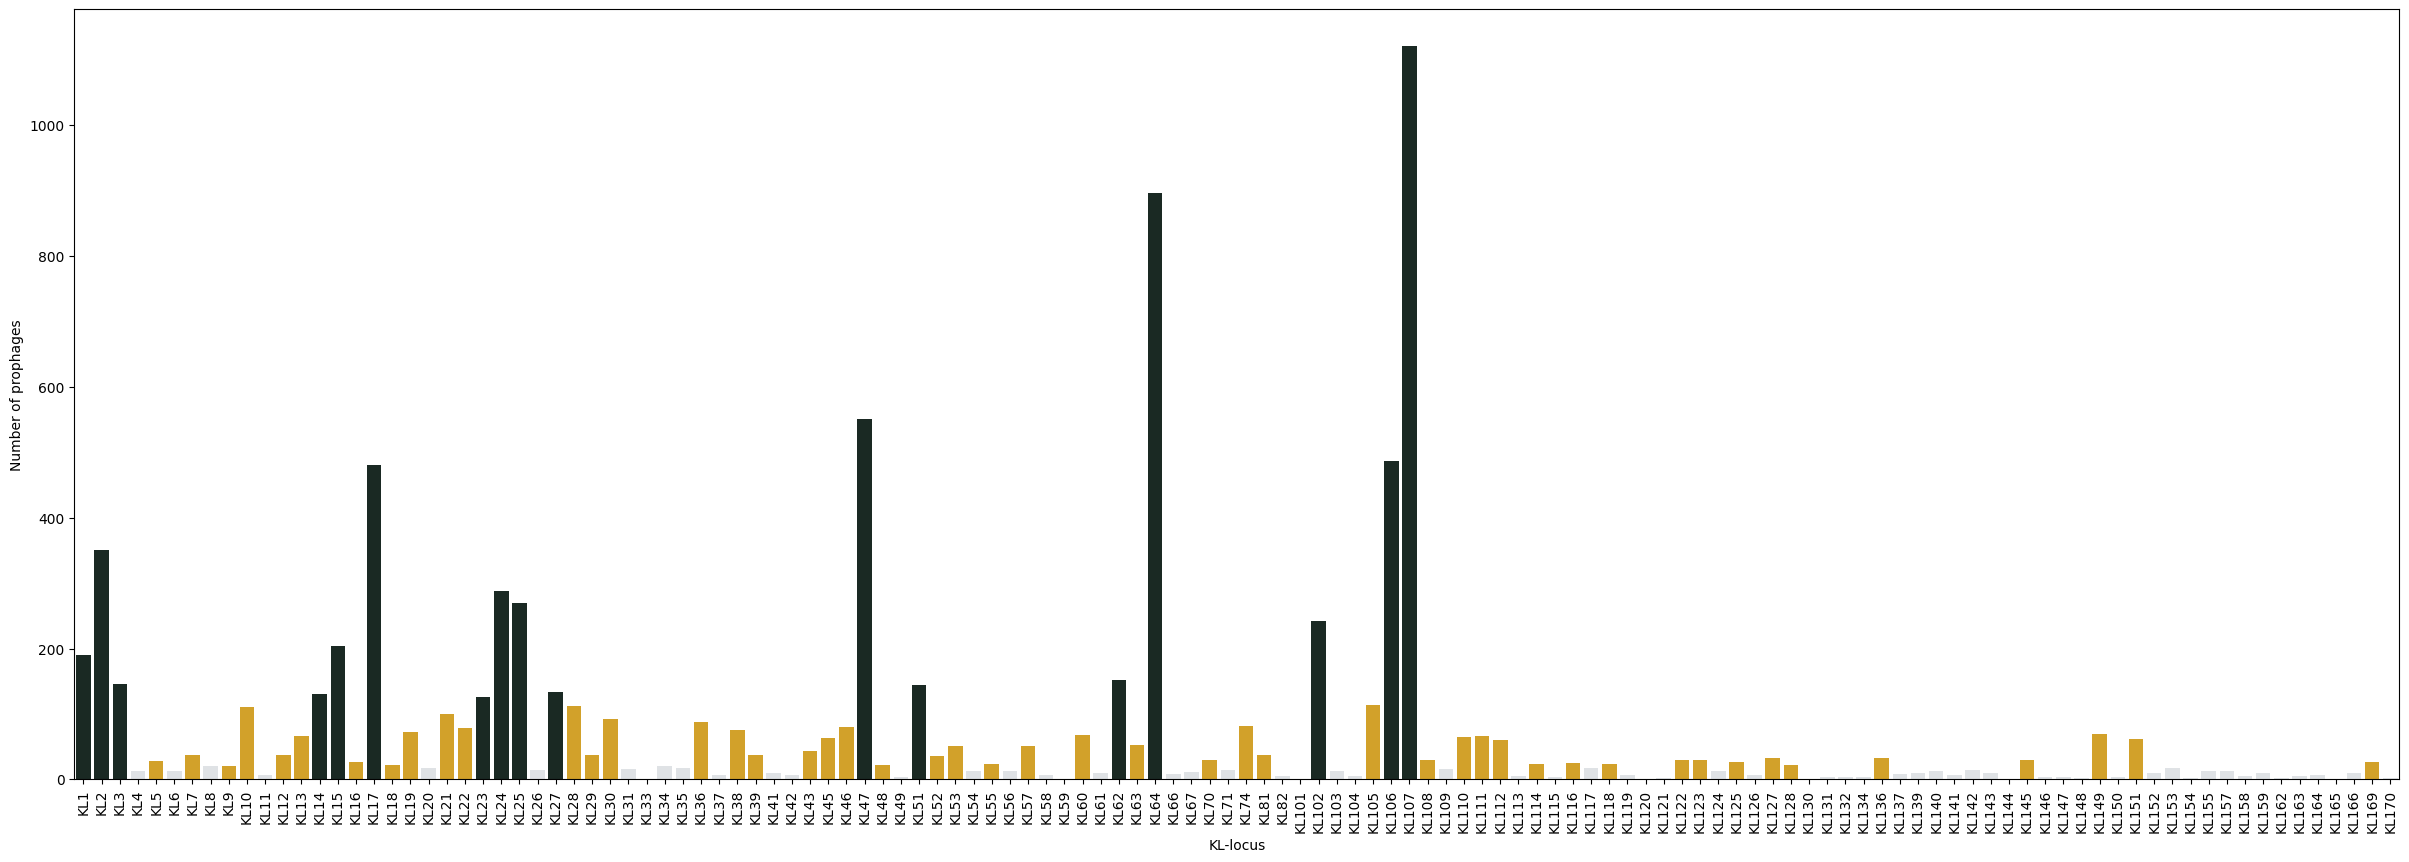

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring keys and values are in list format
keys = list(clean_dico.keys())
values = list(clean_dico.values())  # Directly getting values from the dictionary

# Generate a list of colors for each key based on its value
colors = [dico_color[value] for value in keys]

# Create the plot
plt.figure(figsize=(30, 10))
sns.barplot(x=list(clean_dico.keys()), y=list(clean_dico.values()), palette=colors)

# Labeling
plt.xlabel('KL-locus')
plt.ylabel('Number of prophages')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Save the plot
plt.savefig("/media/concha-eloko/Linux/papers/PPT/figures_draft/plot_prophage_counts.2302.svg")

# Show the plot
plt.show()

***
# Depolymerase scan :

In [23]:
DF_info_clear = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]

In [26]:
len(DF_info_clear["seq"].unique())

3933

In [28]:
DF_info_clear.drop_duplicates(subset = ["Phage"])

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,0.025276,0.053137,...,-0.011464,0.081105,0.012011,0.042917,0.009402,0.093175,-0.080562,0.000897,0.111854,prophage_11309
4,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
10,GCF_001701985.1__phage2,GCF_001701985.1__phage2__357,KL30,n4988,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_6465
12,GCF_001611095.1__phage5,GCF_001611095.1__phage5__1365,KL30,n49894989,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
15,GCF_902156555.1__phage3,GCF_902156555.1__phage3__511,KL30,GCF_902156555.1,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21341,GCF_000349245.1__phage1,GCF_000349245.1__phage1__213,KL53,n56795679,anubis_return__4209,anubis_return,MTRLPESSLWEDEIELISRSERVSGGLDGVANRPLKSLANRTRYLK...,LGRLWKRRFEGNEIRMAWARAKSLKQTSAPQDFAFKNCLKAAASIS...,-0.001302,0.069886,...,0.014471,0.095149,0.058190,0.047760,0.130289,0.055118,-0.061362,0.013399,0.027540,prophage_237
21342,GCF_900506765.1__phage17,GCF_900506765.1__phage17__90,KL149,GCF_900506765.1,anubis_return__4216,anubis_return,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,0.053704,0.083858,...,0.032803,0.109572,0.010032,0.024949,0.094129,0.028693,-0.061396,0.006824,0.046220,prophage_15598
21346,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,0.073450,0.046651,...,0.035302,0.012151,0.003563,-0.022575,0.014130,0.063376,-0.050646,-0.085156,-0.010849,prophage_6002
21347,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656


In [29]:
15230/77803*100


19.575080652417

In [22]:
Counter({'right-handed beta-helix': 2722,
         '6-bladed beta-propeller': 714,
         'TIM beta/alpha-barrel': 294,
         'Alpha/Beta hydrolase fold': 114,
         'triple-helix': 32,
         'alpha/alpha toroid': 29,
         'unknown': 3})

depo_1 = '#c6aa58ff'  
depo_2 = '#8d0801'  
depo_3 = '#172b23f0'  
depo_4 = '#b3aa99'  
depo_5 = '#dee2e6'  

depo_6 = '#5f3d2e'  

labels = ['right-handed β-helix', '6-bladed β-propeller', 'TIM β/α-barrel', 'α/β hydrolase', 'triple-helix', 'α/α toroid']
sizes = [2722, 714, 294, 114, 32, 29]  # The percentages for each category


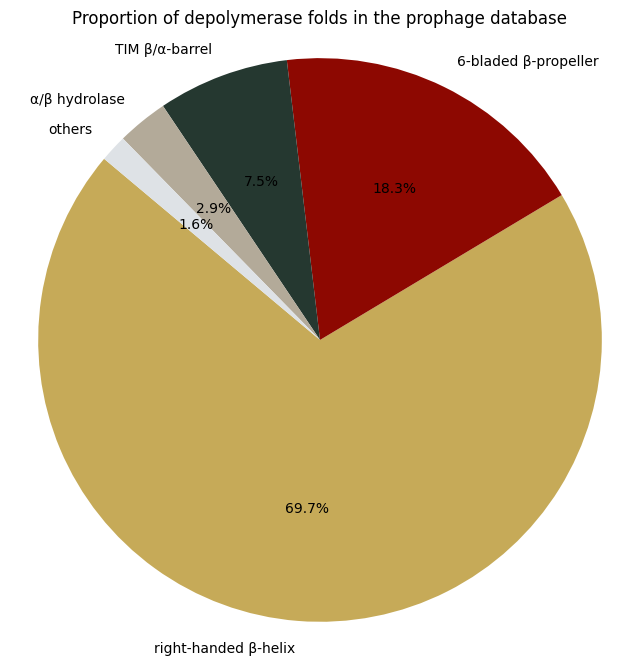

In [25]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['right-handed β-helix', '6-bladed β-propeller', 'TIM β/α-barrel', 'α/β hydrolase', 'others']
sizes = [2722, 714, 294, 114, 61]  # The percentages for each category
colors = [depo_1, depo_2, depo_3, depo_4,depo_5]  # Custom colors

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center of pie to make it look like a donut
#centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
#fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Title
plt.title('Proportion of depolymerase folds in the prophage database')
plt.savefig("/media/concha-eloko/Linux/papers/PPT/figures_draft/pie_chart_depo_proportions.2501.svg")

# Show the plot
plt.show()

In [14]:
2722+714+294+114+32+29

3905